# Méthodes à noyau

### *Nicolas HUBERT*

In [1]:
%matplotlib inline
from pylab import *
from sklearn.datasets.samples_generator import *

## Support Vector Machine Avec Noyau Linéaire

Le code ci-dessous permet de générer des points selon des Gaussiennes isotropiques (voir [ici](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)).

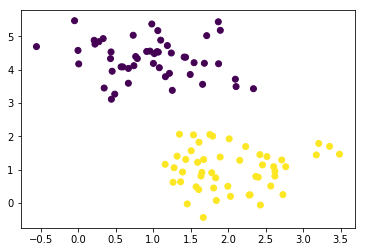

In [2]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y);

Ce jeu de données est très facile à séparer, notamment via un séparateur linéaire. Par exemple, la droite d'équation y = 0.6 x + 1.6 sépare parfaitement les deux catégories de points.

> Evaluer graphiquement la marge géométrique pour cette droite de séparation.

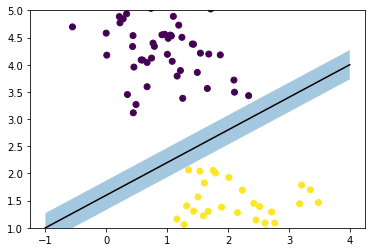

In [3]:
xfit = np.linspace(-1, 4)
plt.scatter(X[:, 0], X[:, 1],c=y)

marge = 0.27
yfit =  0.6*xfit + 1.6
plt.plot(xfit, yfit, '-k')
plt.fill_between(xfit, yfit - marge, yfit + marge,alpha=0.4)
plt.ylim(1,5);

On rappelle que le problème Primal du SVM s'écrit 

\begin{align*}
&   \min_{w \in \mathbb R^d,\, b \in \mathbb R,\,  \xi \in   \mathbb R^n}   \quad \frac 12 \| w\|^2     +  C \sum_{i=1}^n  \xi_i  \\ 
&  \mbox{subject to}  \quad    y_i (\langle w,x_i \rangle   + b)   \geq 1 - \xi_i    \quad \mbox{ and } \quad   \xi_i \geq 0  , \,    \,  i = \dots n 
\end{align*}

> Pourquoi dans le cas présent est-il pertinent de choisir la constante $C$ très grande dans le problème SVM ? 

C est un paramètre de régularisation; il contrôle le trade-off entre l'obtention d'une erreur de généralisation faible sur le train set et la minimisation de la norme des poids. Une grande valeur pour C conduit à choisir une marge plus étroite par rapport à l'hyperplan. Une faible valeur pour C va induire plus de "relâchement" pour la mauvaise classification des points : on s'autorise une marge plus large au prix d'un certain nombre de points mal classés.

Ici les nuages sont très distincts et les points sont "bien" rangés dans leur groupe respectif. Il n'est donc pas nécessaire d'avoir des marges plus larges.

   
> Ajuster  sur ces données un classifieur SVM avec noyau linéaire : utiliser la fonction `SVC()` du module [sklearn.svm](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm), avec l'argument `kernel='linear'`.   

> Afficher les prédictions et vérifier que le prédicteur ne fait aucune erreur sur cet exemple.

In [4]:
from sklearn.svm import SVC 
mon_svc = SVC(kernel='linear', C=1E10)
mon_svc.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [5]:
mon_svc.predict(X)

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [6]:
mon_svc.score(X,y)

1.0

Les instructions ci-dessous permettent d'afficher les deux plans marginaux qui portent les vecteurs support : 
$$ \{ x \, | \,  \langle x ,w \rangle + b  =  1 \} $$
et 
$$ \{ x \, | \,  \langle x ,w \rangle + b  = - 1 \}. $$

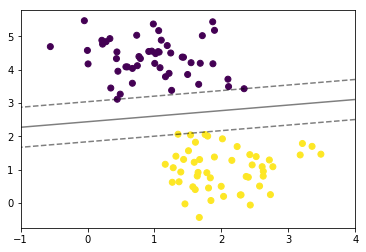

In [7]:
plt.scatter(X[:, 0], X[:, 1], c= y)
x1grid, x2grid = np.meshgrid(np.linspace( -1, 4 , 30), np.linspace(1, 5, 30))
x1x2 = np.vstack([x1grid.ravel(), x2grid.ravel()]).T
P = mon_svc.decision_function(x1x2).reshape(x1grid.shape)
plt.contour(x1grid, x2grid, P, colors='k', 
            levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--']);


Il est possible de recupérer les points de support dans l'attribut `support_vectors_`.
> Afficher et superposer sur le nuage de points les points support.

In [8]:
mon_svc.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [1.35139348, 2.06383637]])

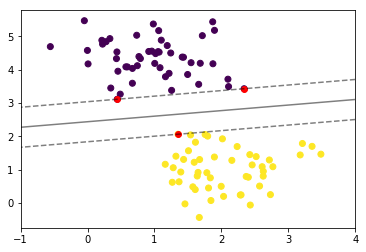

In [9]:
plt.scatter(X[:, 0], X[:, 1], c= y)
x1grid, x2grid = np.meshgrid(np.linspace( -1, 4 , 30), np.linspace(1, 5, 30))
x1x2 = np.vstack([x1grid.ravel(), x2grid.ravel()]).T
P = mon_svc.decision_function(x1x2).reshape(x1grid.shape)
plt.contour(x1grid, x2grid, P, colors='k', 
            levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--']);
plt.scatter(mon_svc.support_vectors_[:, 0], mon_svc.support_vectors_[:, 1],
            s=35, lw=1, facecolors='red'); #points supports

## SVM à noyau non linéaire

Nous allons maintenant utiliser des noyaux non linéaires.

On importe les données suivantes:

In [10]:
X, y = make_circles(100, factor=.1, noise=.1)

> Afficher les données et essayer d'ajsuter un classifieur linéaire sur les données  avec un classifieur linéaire. 

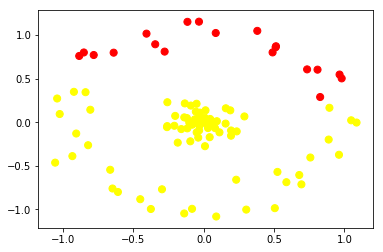

In [11]:
svm_cercle= SVC(kernel='linear').fit(X, y)
ypred = svm_cercle.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=ypred, s=50, cmap='autumn')

Attention, si on prend $C$ trop grand on limite trop les variables de relachement et l'algo peine à converger.
En effet ici les donnnées se sont pas séparables linéairement.

In [12]:
score = svm_cercle.score(X,y)
score

0.69

Pour mieux séparer les données, on peut essayer de projeter les données dans un espace de dimension 3.

> Créer une composante supplémentaire  $ x_3 =  \|x \|^2$. Vérifier graphiquement que l'on peut alors facilement séparer les deux groupes. 

In [13]:
X3 = np.array([np.linalg.norm(X[i,:]) for i in range(len(X))])

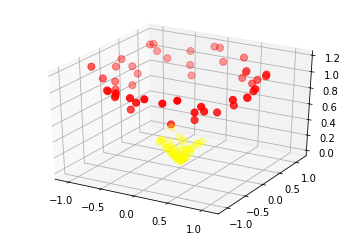

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X3, c=y, s=50, cmap='autumn');

On voit bien ci-dessus que les deux groupes se distinguent clairement, et sont séparables par un hyperplan : On peut fonder notre règle de décision sur le fait qu'un point vérifie ou non la condition x3 > 0.5 (sa troisième composante).

> Ajuster un classifieur RBF (radial basis function) à l'aide de la fonction `SVC()` sur les données (sans X3). Afficher les points supports, les prédictions et les frontières sur un même graphique.

In [15]:
mon_rbf = SVC(kernel='rbf')
mon_rbf.fit(X,y)
ypred = mon_rbf.predict(X)
mon_rbf.score(X,y)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0

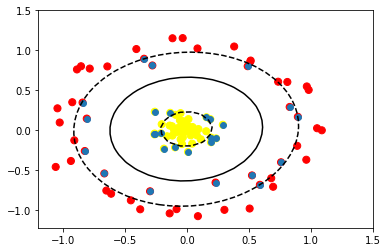

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
x1grid, x2grid = np.meshgrid(np.linspace( -1, 1.5 , 30), np.linspace(-1, 1.5, 30)) 
# https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy
x1x2 = np.vstack([x1grid.ravel(), x2grid.ravel()]).T # https://www.tutorialspoint.com/numpy/numpy_vstack.htm
P = mon_rbf.decision_function(np.c_[x1grid.ravel(),x2grid.ravel()]).reshape(x1grid.shape)
plt.contour(x1grid, x2grid, P, colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(mon_rbf.support_vectors_[:, 0], mon_rbf.support_vectors_[:, 1],
            s=35, lw=1);

# Soft margin SVM 

On considère maintenant le problème SVM avec marges souples. Commençons par générer deux catégories de points non linéairement séparables :  

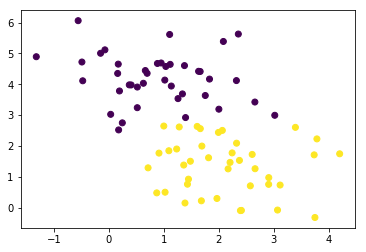

In [17]:
X, y = make_blobs(n_samples=80, centers=2,
                  random_state=0, cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], c=y);

> Ajuster et représenter des SVM linéaires, avec $C=1$. Comparer les hyperplans marginaux pour $C=1$ et $C=10$.

In [18]:
mon_rbf = SVC(kernel='linear',C=1)
mon_rbf.fit(X,y)
print(mon_rbf.score(X,y))

0.975


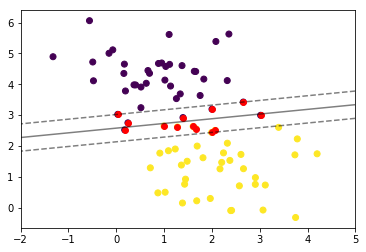

In [19]:
# représentation graphique C = 1
plt.scatter(X[:, 0], X[:, 1], c= y)
x1grid, x2grid = np.meshgrid(np.linspace( -2, 5 , 30), np.linspace(1, 5, 30))
x1x2 = np.vstack([x1grid.ravel(), x2grid.ravel()]).T
P = mon_rbf.decision_function(x1x2).reshape(x1grid.shape)
plt.contour(x1grid, x2grid, P, colors='k', 
            levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--']);
plt.scatter(mon_rbf.support_vectors_[:, 0], mon_rbf.support_vectors_[:, 1],
            s=35, lw=1, facecolors='red'); #points supports

In [20]:
mon_rbf = SVC(kernel='linear',C=10)
mon_rbf.fit(X,y)
print(mon_rbf.score(X,y))

0.9875


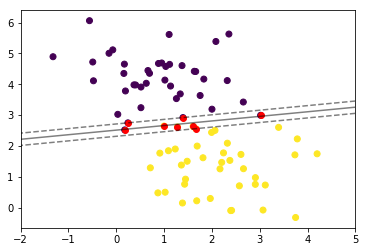

In [21]:
# représentation graphique C = 10
plt.scatter(X[:, 0], X[:, 1], c= y)
x1grid, x2grid = np.meshgrid(np.linspace( -2, 5 , 30), np.linspace(1, 5, 30))
x1x2 = np.vstack([x1grid.ravel(), x2grid.ravel()]).T
P = mon_rbf.decision_function(x1x2).reshape(x1grid.shape)
plt.contour(x1grid, x2grid, P, colors='k', 
            levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--']);
plt.scatter(mon_rbf.support_vectors_[:, 0], mon_rbf.support_vectors_[:, 1],
            s=35, lw=1, facecolors='red'); #points supports

On visualise l'effet de $C$ sur la marge géométrique.

Lorsque l'on change $C$, on change la solution $(w^\star,b^\star, \xi^\star)$ du problème SVM à marges souples. Et donc on change la règle décision 
$$ x \mapsto  \mbox{sign}(\langle x,w^\star \rangle +b^\star) $$ 

> Choisir $C$ dans $[0.001,0.01,0.05,0.1,2,1,10,100,10^3,10^4]$ en évaluant l'erreur de généralisation par un découpage train test.

In [22]:
Cgrid = np.array([0.001,0.01,0.05,0.1,2,1,10,100,10^3,10^4])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
C_score= []

for C in Cgrid:
    Mon_SVM_train_test = SVC(kernel='linear', C=C).fit(X_train, y_train)
    
    C_score.append(Mon_SVM_train_test.score(X_test, y_test) )    
print(C_score)   

[0.4, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95]


Les scores du sélecteur selon la constante C nous montrent que le choix de la variable n'a plus d'importance dès que C est supérieur à 0.01. On choisit donc cette valeur.

# SVM pour la reconnaissance faciale

Nous allons maintenant utiliser le classifieur SVM pour un problème de reconnaissance faciale. On utilise une bibliothèques d'images étiquetées de la librairie Wild dataset, qui est consitituée de photos publiques de personnalités. Il est possible de charger ces données via sckit-learn de la façon suivante (la premières fois cela peut prendre quelques minutes, connexion internet nécessaire).

In [23]:
from sklearn.datasets import fetch_lfw_people
#  on ne garde que les images des personnes
# observées au moins 100 fois :
faces = fetch_lfw_people(min_faces_per_person=100) 
print(faces.target_names)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [24]:
print(faces.images.shape)

(1140, 62, 47)


On dipose de 1140 images de dimension 62 x 47 (niveau de gris d'un pixel = une variable).   
Il s'agit donc d'un problème de classification multiclasses en dimension 2914.    
On vectorialise chaque image : une observation = 1 vecteur de taille 2914 dans lequel on dispose des niveaux de gris de tous les pixels de l'image.

Pour afficher les images de notre base :

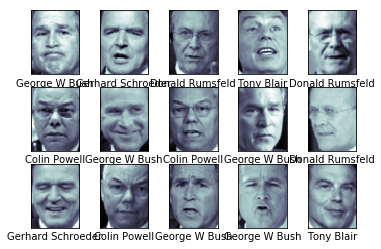

In [25]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

> Combien de classes comporte ce problème ? 

In [26]:
target_names = faces.target_names
n_classes = target_names.shape[0]
print(n_classes)

5


> Reduire le nombre de features à 200 (par PCA ou en utilisant `SelectKbest`)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [28]:
n_samples, h, w = faces.images.shape
X = faces.data
y = faces.target
n_features = X.shape[1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

n_components = 200
 
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

> Ajuster un  SVM RBF et un SVM linéaire sur ces données, évaluer l'erreur de test pour $C=0.1$. On pendra garde à équilibrer la perte avec : class_weight='balanced' dans la fonction `SVC()`. Essayer aussi sans cette commande (regarder la matrice de confusion).

In [29]:
svm_rbf = SVC(kernel='rbf', class_weight='balanced', C=0.1).fit(X_train_pca, y_train)
svm_lin = SVC(kernel='linear', class_weight='balanced', C=0.1).fit(X_train_pca, y_train)
y_pred_rbf = svm_rbf.predict(X_test_pca)
y_pred_lin = svm_lin.predict(X_test_pca)
print(svm_rbf.score(X_test_pca, y_test))
print(svm_lin.score(X_test_pca, y_test))

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.10175438596491228
0.8456140350877193


> Résumer les performances du classifieur  en utilisant la fonction `classification_report()` de la librairie `sklearn.metrics`.

In [31]:
print(classification_report(y_test, y_pred_rbf, target_names=target_names))
print(classification_report(y_test, y_pred_lin, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.00      0.00      0.00        64
  Donald Rumsfeld       0.00      0.00      0.00        32
    George W Bush       0.00      0.00      0.00       127
Gerhard Schroeder       0.10      1.00      0.18        29
       Tony Blair       0.00      0.00      0.00        33

        micro avg       0.10      0.10      0.10       285
        macro avg       0.02      0.20      0.04       285
     weighted avg       0.01      0.10      0.02       285

                   precision    recall  f1-score   support

     Colin Powell       0.82      0.83      0.82        64
  Donald Rumsfeld       0.83      0.78      0.81        32
    George W Bush       0.86      0.89      0.88       127
Gerhard Schroeder       0.89      0.86      0.88        29
       Tony Blair       0.81      0.76      0.78        33

        micro avg       0.85      0.85      0.85       285
        macro avg       0.84      0.82      0.83   

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


> Afficher la matrice de confusion à l'aide de la fonction `confusion_matrix()` de la librairie
`sklearn.metrics`.

In [32]:
import seaborn as sns
print(confusion_matrix(y_test, y_pred_rbf, labels=range(n_classes)))

[[  0   0   0  64   0]
 [  0   0   0  32   0]
 [  0   0   0 127   0]
 [  0   0   0  29   0]
 [  0   0   0  33   0]]


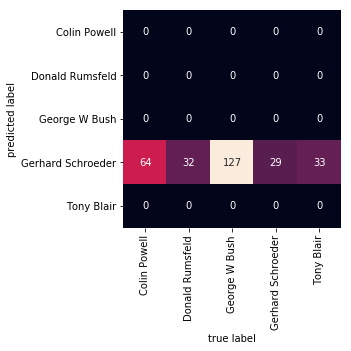

In [36]:
mat = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [45]:
#matrice de confusion sans les poids équilibrés
svm_lin_nobal = SVC(kernel='linear', C=0.1).fit(X_train_pca, y_train)
y_pred_lin_nobal = svm_lin_nobal.predict(X_test_pca)
confusion_matrix(y_test, y_pred_lin_nobal)

array([[ 51,   2,   8,   2,   1],
       [  1,  25,   3,   1,   2],
       [  9,   5, 111,   0,   2],
       [  1,   0,   2,  25,   1],
       [  1,   0,   7,   0,  25]], dtype=int64)

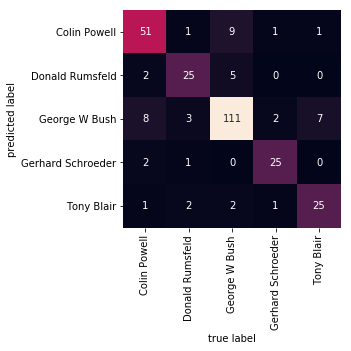

In [46]:
mat = confusion_matrix(y_test, y_pred_lin_nobal)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [47]:
print(confusion_matrix(y_test, y_pred_lin, labels=range(n_classes)))

[[ 53   1   7   2   1]
 [  1  25   3   1   2]
 [  8   4 113   0   2]
 [  2   0   1  25   1]
 [  1   0   7   0  25]]


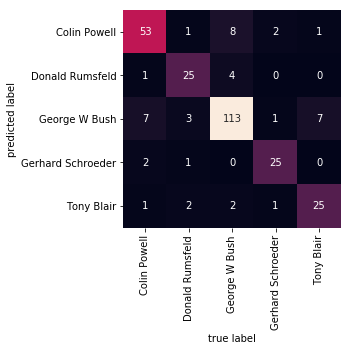

In [48]:
mat = confusion_matrix(y_test, y_pred_lin)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

> Ajuster un modèle RBF par validation croisée en utilisant la fonction `gridsearch`.

In [49]:
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5)
clf = clf.fit(X_train_pca, y_train)
print(clf.best_estimator_)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Attention : ce ne sont de toutes façons pas les outils les plus efficaces pour de l'analyse d'image !!!!

# Kernel regression : molecule activity prediction

Nous nous intéressons dans cette partie du TP aux méthodes à noyau pour la régression : voir [ici](https://en.wikipedia.org/wiki/Support-vector_machine#Regression).

Nous étudions ici un problème de biochimie. Il s'agit de prédire une quantité numérique appelée activité moléculaire, en fonction de la structure de la molécule. Cette activité permet d'évaluer la capacité d'une molécule à facilité l'appareillement avec d'autres élements moléculaire. Cette question est très importante par exemple pour la conception de médicaments efficaces. 

De façon très schématique, une molécule peut être décrite sous la forme d'un graphe dont les sommets sont les atomes et dont les arêtes représentent les liens entre ces derniers. Pour définir un noyau (intuitivement une similarité) sur l'espace des molécules, on considère l'ensemble $\mathcal C_l$ de tous les chemins d'atomes de longueur inférieure à $l$, au sein de l'espace des graphes de molécules. Pour un chemin d'atomes $c$ et une molécule $x$, on pose $I(x,c) = 1$ si le chemin $c$ est possible dans le graphe représentant la molécule $x$, et $0$ sinon.

Pour deux molécules $x$ and $x'$, on définit la similarité entre $x$ et $x'$ par le nombre de chemin possibles communs à $x$ et $x'$:
$$ u(x,x')= \sum_{c \in \mathcal C _l}  I(x,p) I(x',p). $$
Le noyau de Tanimoto est alors défini par la renormalisation suivante de la densité:
$$ k(x,x')= \frac{u(x,x′)}{u(x,x)+u(x',x')−u(x,x')} $$

Les données sont disponibles à [cette adresse](http://bertrand.michel.perso.math.cnrs.fr/Enseignements/Data/data_ncicancer.zip). Vous disposez de la matrice de Gram ainsi que du vecteur des activités.

In [50]:
path =  "C:/Users/acer/Documents/APST/data_ncicancer"

K = np.loadtxt(path + "/ncicancer_kernel_hf_ex0.txt") # Matrice de Gram
y = np.loadtxt(path + "/ncicancer_targets_ex0.txt")[:, 0] # activités
y = (y-np.min(y)) / (np.max(y)-np.min(y)) # normalisation des activités

> Découper aléatoirement l'échantillon en 3/4 des données pour le train et 1/4 pour le test: il s'agit notamment d'extraire de $K$ 
les sous-matrices pour le train et le test.

In [51]:
Ktrain, Ktest, ytrain, ytest = train_test_split(K,y,test_size=0.25)

> Ajuster un régresseur SVR sur les données de train en choisissant les constantes $C$ et $\varepsilon$ par validation croisée. Evaluer les performances du régresseur SVR choisir sur les données de test.

In [52]:
from sklearn.svm import SVR

In [53]:
v_eps = [0.01,0.1,1,5,10]
v_C = [0.1,1,5,10,100]
eps_max = v_eps[0]
C_max = v_C[0]
score_tot = 0
for eps in v_eps:
    for C in v_C:
        mon_reg = SVR(C=C,epsilon=eps).fit(Ktrain,ytrain)
        mon_score = mon_reg.score(Ktest,ytest)
        if mon_score > score_tot:
            eps_max=eps
            C_max=C
            score_tot=mon_score
print(eps_max,C_max)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

0.01 100


C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [54]:
# en utilisant directement GridSearchCV
param_grid = {'C': [0.1,1,5,10,100],
              'epsilon': [0.01,0.1,1,5,10], }
clf = GridSearchCV(SVR(),param_grid, cv=5)
clf = clf.fit(Ktrain, ytrain)
print(clf.best_estimator_)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.01,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)


In [55]:
best_reg = SVR(C=C_max, epsilon=eps_max).fit(Ktrain, ytrain)
best_score = best_reg.score(Ktest, ytest)
print(best_score)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.3396924140907569


> La méthode [kernel ridge](https://scikit-learn.org/stable/modules/kernel_ridge.html#kernel-ridge) permet-elle ici d'améliorer les performances de prédiction ? 

In [56]:
from sklearn.kernel_ridge import KernelRidge 
clf = KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=None, kernel='linear',
            kernel_params=None)
myreg = clf.fit(Ktrain, ytrain)
myreg.score(Ktest, ytest)

0.36787420956102224

La méthode kernel ridge permet d'améliorer un peu le score.

> Visualiser les données à l'aide de la méthode [Kernel PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA) pour le noyau $K$.

In [57]:
from sklearn.decomposition import KernelPCA

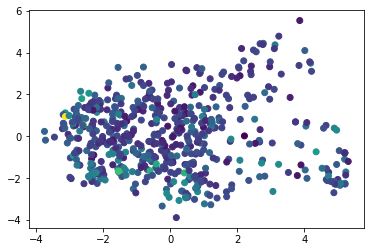

In [58]:
transformer = KernelPCA(n_components=2, kernel='linear')
K_transformed = transformer.fit_transform(Ktest)
plt.scatter(K_transformed[:,0],K_transformed[:,1],c=ytest)

> Implémenter une version batch kernel pour accélérer SVR : extraire des sous matrices de $K$ sur des échantillons de taille 100 et aggréger les prédictions.

In [59]:
def batch_SVR(Ktrain, Ktest, ytrain, C, eps, nbiter):
    n,p = np.shape(Ktest)
    ypred=np.zeros(n)
    for i in range(nbiter):
        sample = np.random.choice(n,size=100,replace=False)
        sub_Ktrain = Ktrain[sample,:]
        sub_ytrain = ytrain[sample]
        reg = SVR(C=C,epsilon=eps).fit(sub_Ktrain,sub_ytrain)
        ypred = ypred + reg.predict(Ktest)
    return ypred/nbiter

In [60]:
C=100
eps=0.1
ypred = batch_SVR(Ktrain, Ktest, ytrain, C, eps, 10)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

(array([218., 186.,  97.,  49.,   9.,  13.,   2.,   2.,   0.,   1.]),
 array([4.48382133e-04, 2.02259148e-01, 4.04069915e-01, 6.05880681e-01,
        8.07691447e-01, 1.00950221e+00, 1.21131298e+00, 1.41312375e+00,
        1.61493451e+00, 1.81674528e+00, 2.01855605e+00]),
 <a list of 10 Patch objects>)

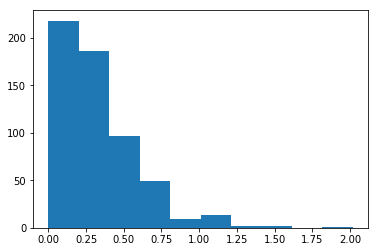

In [61]:
accuracy = abs(ypred-ytest)/ypred
plt.hist(accuracy)